In [1483]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib

In [1467]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# File paths (adjust as needed)
file_paths = {
    'cleveland': r'C:\Users\Ali\UCI-Disease\processed.cleveland.data',
    'hungarian': r'C:\Users\Ali\UCI-Disease\processed.hungarian.data',
    'switzerland': r'C:\Users\Ali\UCI-Disease\processed.switzerland.data',
    'long_beach': r'C:\Users\Ali\UCI-Disease\processed.va.data'
}

# Dictionary to store each dataset
dataframes = {}

# Read each file into its own DataFrame
for name, path in file_paths.items():
    df = pd.read_csv(path, names=column_names, na_values='?')
    dataframes[name] = df

# Now you can access each DataFrame like this:
cleveland_df = dataframes['cleveland']
hungarian_df = dataframes['hungarian']
switzerland_df = dataframes['switzerland']
long_beach_df = dataframes['long_beach']

In [1469]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [1471]:
df.shape

(200, 14)

In [1473]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

In [1475]:
df.drop(columns=['ca','thal'],inplace=True)

In [1479]:
df
input_df=df
input_df['cp'].value_counts()

cp
4    131
3     47
2     14
1      8
Name: count, dtype: int64

In [1351]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
target        0
dtype: int64

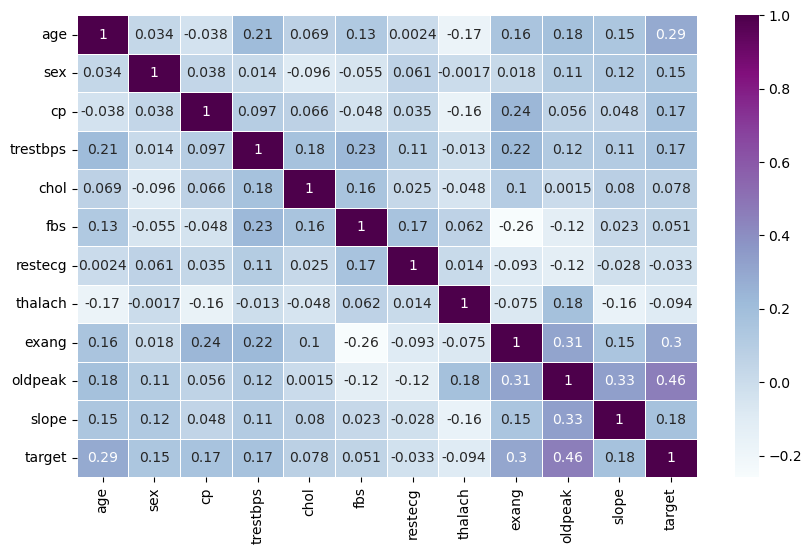

In [1353]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [1354]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
target        0
dtype: int64

In [1357]:
df.drop(columns=['slope'],inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,0


In [1359]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
df['thalach'].fillna(df['thalach'].median(),inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)
df['exang'].fillna(df['exang'].median(),inplace=True)
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['fbs'].fillna(df['fbs'].mean(),inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_1092\3185107317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_1092\3185107317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [1361]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

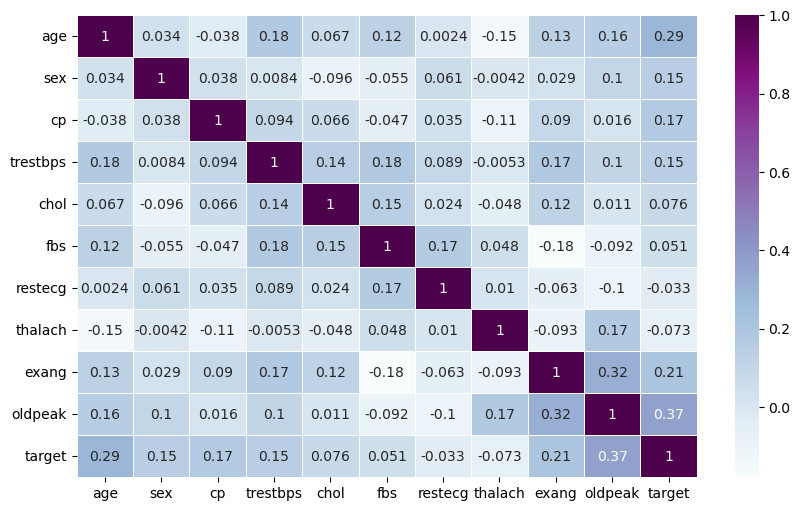

In [1363]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [1463]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,restecg_1,restecg_2,cp_2,cp_3,cp_4
0,63,1,140.0,260.0,0.0,112.0,1.0,3.0,1,True,False,False,False,True
1,44,1,130.0,209.0,0.0,127.0,0.0,0.0,0,True,False,False,False,True
2,60,1,132.0,218.0,0.0,140.0,1.0,1.5,1,True,False,False,False,True
3,55,1,142.0,228.0,0.0,149.0,1.0,2.5,1,True,False,False,False,True
4,66,1,110.0,213.0,1.0,99.0,1.0,1.3,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,127.0,333.0,1.0,154.0,0.0,0.0,1,True,False,False,False,True
196,62,1,130.0,139.0,0.0,120.0,1.0,1.5,0,True,False,False,False,False
197,55,1,122.0,223.0,1.0,100.0,0.0,0.0,1,True,False,False,False,True
198,58,1,130.0,385.0,1.0,120.0,1.0,1.5,0,False,True,False,False,True


Oldest Person is Male and is 77 years old
Youngest Person is Male and is 35 years old
Average Man/woman is 59.35 years old


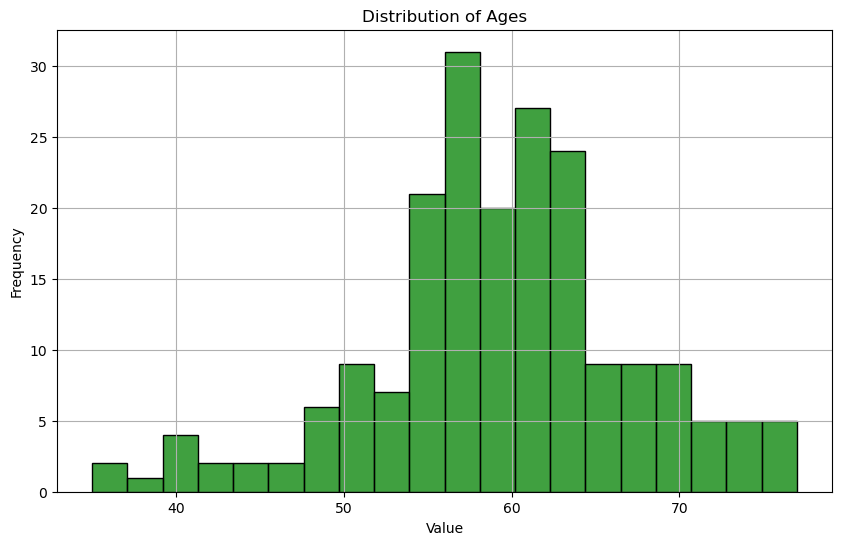

In [1367]:
Oldest_sex=df[df['age']==df['age'].max()]['sex']
Oldest_sex=Oldest_sex.iloc[0]
if  Oldest_sex == 1:
    Oldest_sex='Male'
else:
    Oldest_sex='Female'
print(f"Oldest Person is {Oldest_sex} and is {df['age'].max()} years old")

Youngest_Sex=df[df['age']==df['age'].min()]['sex']
Youngest_Sex=Youngest_Sex.iloc[0]
if  Youngest_Sex == 1:
    Youngest_Sex='Male'
else:
    Youngest_Sex='Female'
print(f"Youngest Person is {Youngest_Sex} and is {df['age'].min()} years old")
print(f"Average Man/woman is {df['age'].mean()} years old")
plt.figure(figsize=(10,6))
sns.histplot(df['age'],color='g',bins=20)
plt.title('Distribution of Ages')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [1369]:
df['target']=(df['target']>0).astype(int)
df['target']

0      1
1      0
2      1
3      1
4      0
      ..
195    1
196    0
197    1
198    0
199    1
Name: target, Length: 200, dtype: int32

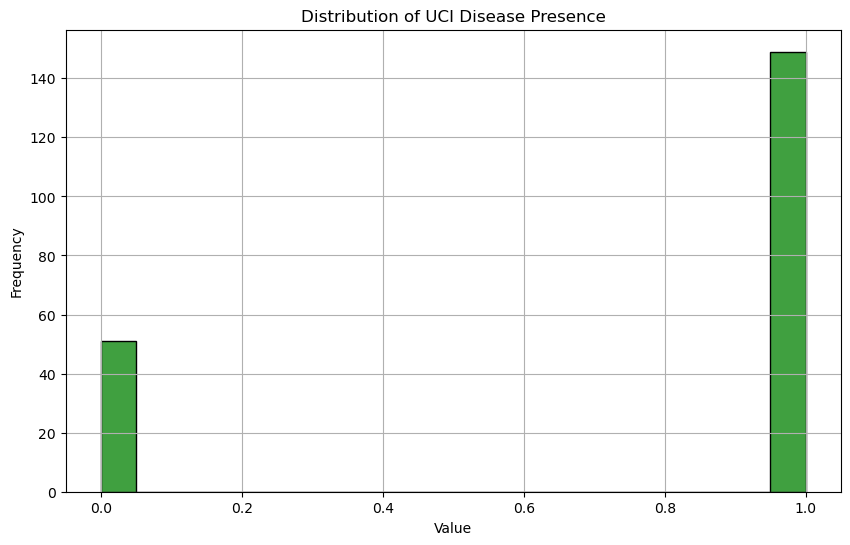

In [1371]:
plt.figure(figsize=(10,6))
sns.histplot(df['target'],color='g',bins=20)
plt.title('Distribution of UCI Disease Presence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [1373]:
df=pd.get_dummies(df,columns=['restecg','cp'],drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,restecg_1,restecg_2,cp_2,cp_3,cp_4
0,63,1,140.0,260.0,0.0,112.0,1.0,3.0,1,True,False,False,False,True
1,44,1,130.0,209.0,0.0,127.0,0.0,0.0,0,True,False,False,False,True
2,60,1,132.0,218.0,0.0,140.0,1.0,1.5,1,True,False,False,False,True
3,55,1,142.0,228.0,0.0,149.0,1.0,2.5,1,True,False,False,False,True
4,66,1,110.0,213.0,1.0,99.0,1.0,1.3,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,127.0,333.0,1.0,154.0,0.0,0.0,1,True,False,False,False,True
196,62,1,130.0,139.0,0.0,120.0,1.0,1.5,0,True,False,False,False,False
197,55,1,122.0,223.0,1.0,100.0,0.0,0.0,1,True,False,False,False,True
198,58,1,130.0,385.0,1.0,120.0,1.0,1.5,0,False,True,False,False,True


In [1375]:
x=df.drop(columns=['target'])
y=df['target']

In [1377]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.46842053,  0.17586311,  0.39857739, ..., -0.27435163,
        -0.55424682,  0.7257531 ],
       [-1.96993293,  0.17586311, -0.148168  , ..., -0.27435163,
        -0.55424682,  0.7257531 ],
       [ 0.08341736,  0.17586311, -0.03881892, ..., -0.27435163,
        -0.55424682,  0.7257531 ],
       ...,
       [-0.55825461,  0.17586311, -0.58556431, ..., -0.27435163,
        -0.55424682,  0.7257531 ],
       [-0.17325143,  0.17586311, -0.148168  , ..., -0.27435163,
        -0.55424682,  0.7257531 ],
       [ 0.34008614,  0.17586311, -0.69491338, ...,  3.64495738,
        -0.55424682, -1.37787907]])

In [1379]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns,index=x.index)
x_scaled

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,restecg_1,restecg_2,cp_2,cp_3,cp_4
0,0.468421,0.175863,0.398577,0.727226,-0.750820,-0.534016,0.592749,1.735082,1.072631,-0.395056,-0.274352,-0.554247,0.725753
1,-1.969933,0.175863,-0.148168,0.270774,-0.750820,0.262627,-1.687055,-1.460281,1.072631,-0.395056,-0.274352,-0.554247,0.725753
2,0.083417,0.175863,-0.038819,0.351324,-0.750820,0.953050,0.592749,0.137401,1.072631,-0.395056,-0.274352,-0.554247,0.725753
3,-0.558255,0.175863,0.507926,0.440825,-0.750820,1.431036,0.592749,1.202522,1.072631,-0.395056,-0.274352,-0.554247,0.725753
4,0.853424,0.175863,-1.241659,0.306574,1.380184,-1.224440,0.592749,-0.075624,-0.932287,2.531286,-0.274352,1.804250,-1.377879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.686589,-5.686241,-0.312192,1.380580,1.380184,1.696583,-1.687055,-1.460281,1.072631,-0.395056,-0.274352,-0.554247,0.725753
196,0.340086,0.175863,-0.148168,-0.355730,-0.750820,-0.109140,0.592749,0.137401,1.072631,-0.395056,-0.274352,-0.554247,-1.377879
197,-0.558255,0.175863,-0.585564,0.396074,1.380184,-1.171330,-1.687055,-1.460281,1.072631,-0.395056,-0.274352,-0.554247,0.725753
198,-0.173251,0.175863,-0.148168,1.845982,1.380184,-0.109140,0.592749,0.137401,-0.932287,2.531286,-0.274352,-0.554247,0.725753


Dataset Shape: (200, 13) 
Number Of Classes : 2
Logistic Regression Results:
Accuracy: 0.7000
Recall: 0.7188
Classification Report:               precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.88      0.72      0.79        32

    accuracy                           0.70        40
   macro avg       0.62      0.67      0.62        40
weighted avg       0.78      0.70      0.73        40
 


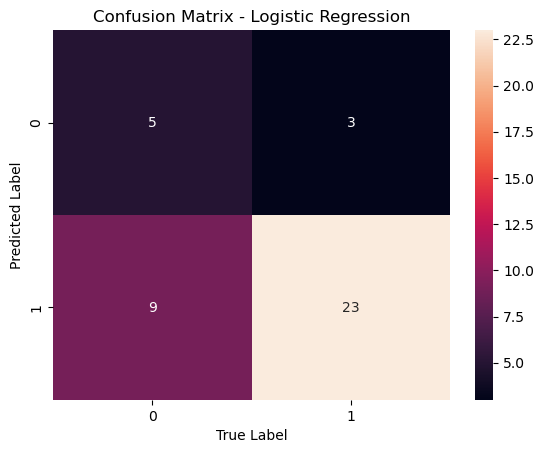

In [1381]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

print(f"Dataset Shape: {x.shape} ")
print(f"Number Of Classes : {len(np.unique(y))}")

lr_model=LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_lr):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_lr)} ")

cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

Decision Tree Results:
Accuracy: 0.6500
Recall: 0.7812
Classification Report:               precision    recall  f1-score   support

           0       0.12      0.12      0.12         8
           1       0.78      0.78      0.78        32

    accuracy                           0.65        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.65      0.65      0.65        40



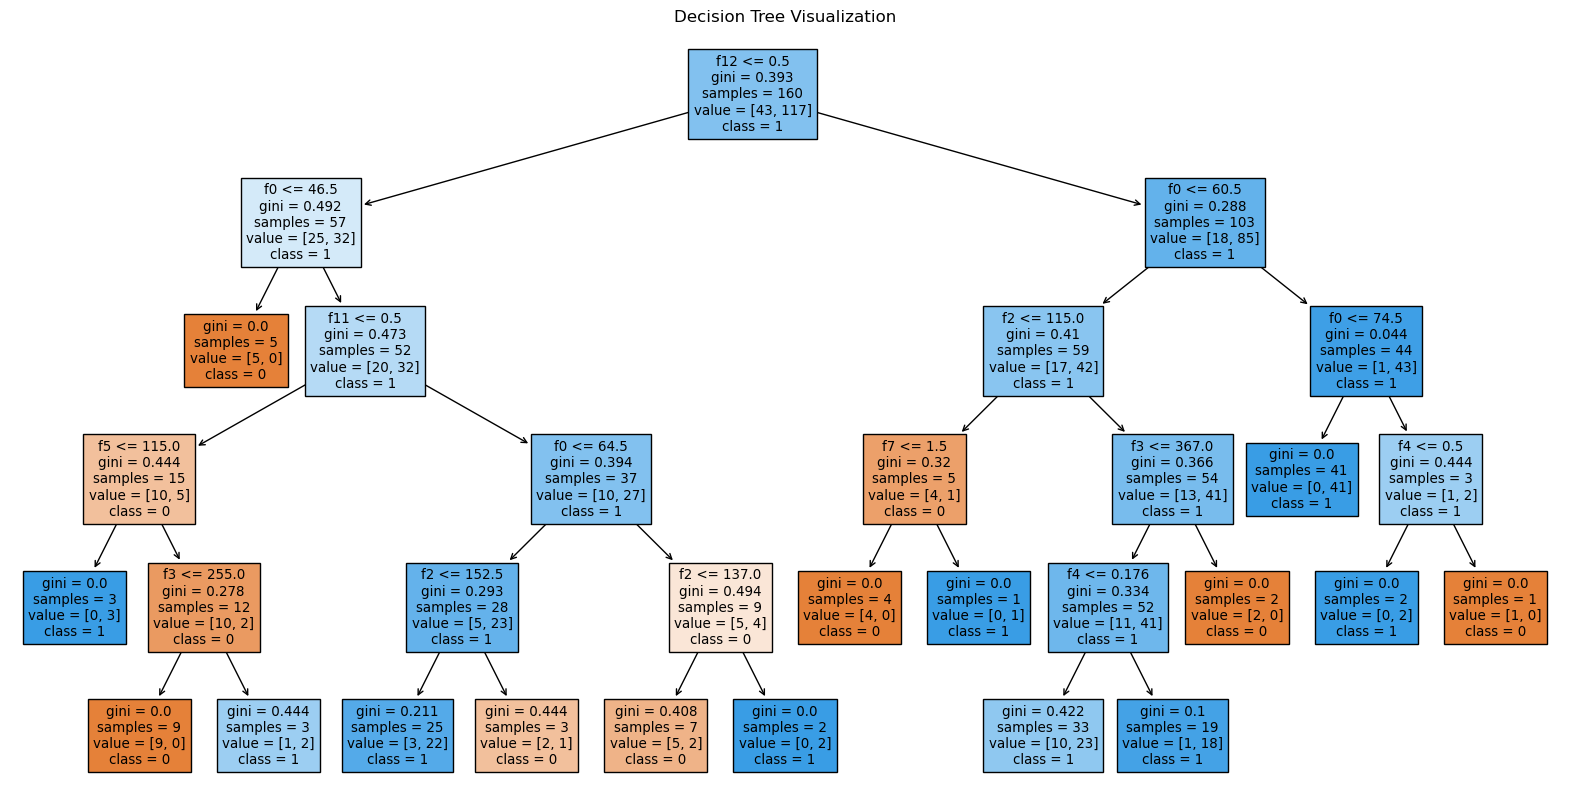

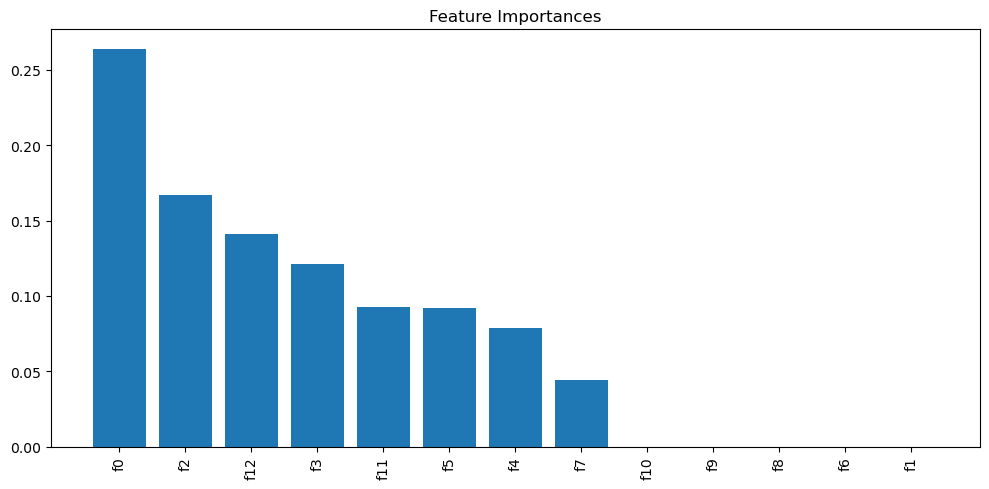

In [1383]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dt_model=DecisionTreeClassifier(random_state=42,max_depth=5)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

print(f"Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_dt):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_dt)}")

plt.figure(figsize=(20,10))
plot_tree(dt_model,filled=True,feature_names=[f'f{i}' for i in range(len(x.columns))],class_names=['0','1'])
plt.title('Decision Tree Visualization')
plt.show()

importances=dt_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.tight_layout()
plt.show()

Random Forest Results
Accuracy: 0.7000
Recall: 0.8125
Classification Report:               precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.81      0.81      0.81        32

    accuracy                           0.70        40
   macro avg       0.53      0.53      0.53        40
weighted avg       0.70      0.70      0.70        40



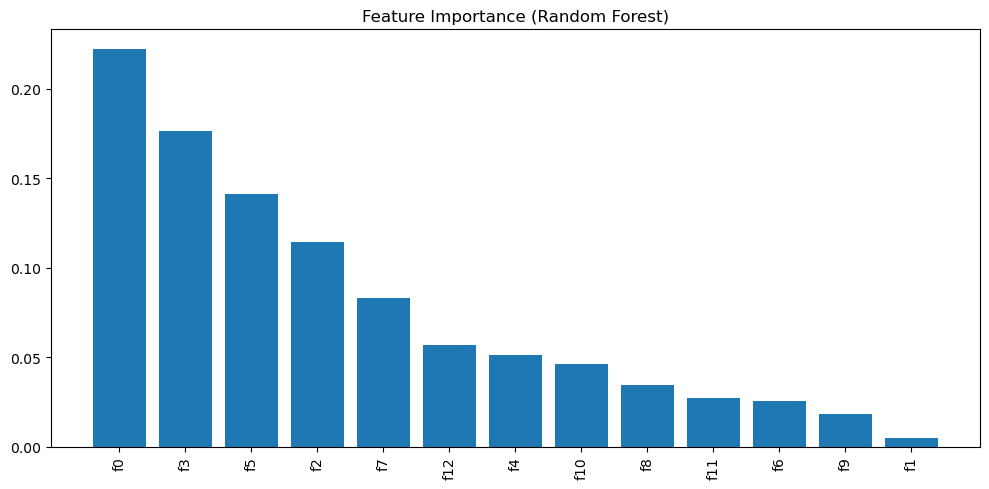

In [1385]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

y_pred_rf=rf_model.predict(x_test)

print(f"Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test,y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_rf):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_rf)}")

importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title('Feature Importance (Random Forest)')
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.tight_layout()
plt.show()

Gradient Boosting Results:
Accuracy: 0.625
Recall: 0.7188
Classification Report:               precision    recall  f1-score   support

           0       0.18      0.25      0.21         8
           1       0.79      0.72      0.75        32

    accuracy                           0.62        40
   macro avg       0.49      0.48      0.48        40
weighted avg       0.67      0.62      0.65        40



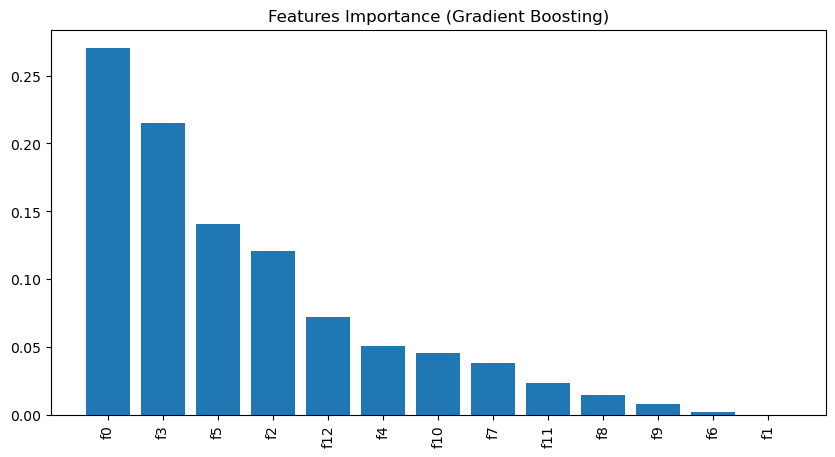

In [1387]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

y_pred_gb=gb_model.predict(x_test)

print(f"Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_gb)}")
print(f"Recall: {recall_score(y_test,y_pred_gb):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_gb)}")

importances=gb_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)),importances[indices])
plt.title('Features Importance (Gradient Boosting)')
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.show()

In [1389]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x,y,test_size=0.2,random_state=42)

x_train_scaled_svm=scaler.transform(x_train_svm)
x_test_scaled_svm=scaler.transform(x_test_svm)

print(f"Dataset Shape: {x.shape}")
print(f"Number Of Classes: {len(np.unique(y))}")

svm_model=SVC(kernel='rbf',random_state=42)
svm_model.fit(x_train_scaled_svm,y_train_svm)

y_pred_svm=svm_model.predict(x_test_scaled_svm)

print(f"SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_svm,y_pred_svm)}")
print(f"Recall: {recall_score(y_test,y_pred_svm):.4f}")
print(f"Classification Report: {classification_report(y_test_svm,y_pred_svm)}")

Dataset Shape: (200, 13)
Number Of Classes: 2
SVM Results:
Accuracy: 0.775
Recall: 0.9375
Classification Report:               precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.81      0.94      0.87        32

    accuracy                           0.78        40
   macro avg       0.57      0.53      0.53        40
weighted avg       0.72      0.78      0.73        40



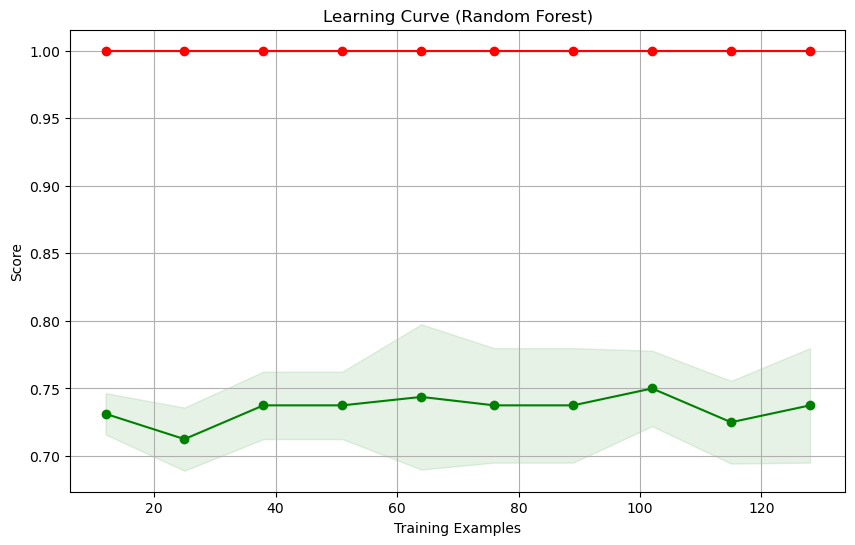

In [1391]:
train_sizes,train_scores,test_scores=learning_curve(
    rf_model,x_train_scaled,y_train,cv=5,n_jobs=1,
    train_sizes=np.linspace(0.1,1.0,10),scoring='accuracy'
)
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
test_scores_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.show()


In [1392]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(x_train_scaled, y_train)
print("Best Logistic Regression params:", grid_lr.best_params_)

Best Logistic Regression params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [1393]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(x_train, y_train)
print("Best Decision Tree params:", grid_dt.best_params_)

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [1394]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(x_train, y_train)
print("Best Gradient Boosting params:", grid_gb.best_params_)

Best Gradient Boosting params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [1395]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(x_train, y_train)
print("Best Random Forest params:", grid_rf.best_params_)

Best Random Forest params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [1396]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')  # or 'f1', 'roc_auc'
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Dataset Shape: (200, 13) 
Number Of Classes : 2
Logistic Regression Results:
Accuracy: 0.7000
Recall: 0.7500
Classification Report:               precision    recall  f1-score   support

           0       0.33      0.50      0.40         8
           1       0.86      0.75      0.80        32

    accuracy                           0.70        40
   macro avg       0.60      0.62      0.60        40
weighted avg       0.75      0.70      0.72        40
 


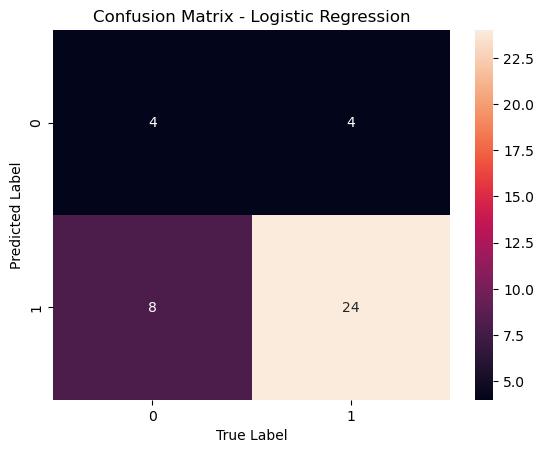

In [1397]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

print(f"Dataset Shape: {x.shape} ")
print(f"Number Of Classes : {len(np.unique(y))}")

lr_model=LogisticRegression(random_state=42,class_weight='balanced',C= 0.01, penalty= 'l2', solver= 'lbfgs')
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_lr):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_lr)} ")

cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

Decision Tree Results:
Accuracy: 0.6750
Recall: 0.7500
Classification Report:               precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.83      0.75      0.79        32

    accuracy                           0.68        40
   macro avg       0.55      0.56      0.55        40
weighted avg       0.72      0.68      0.69        40



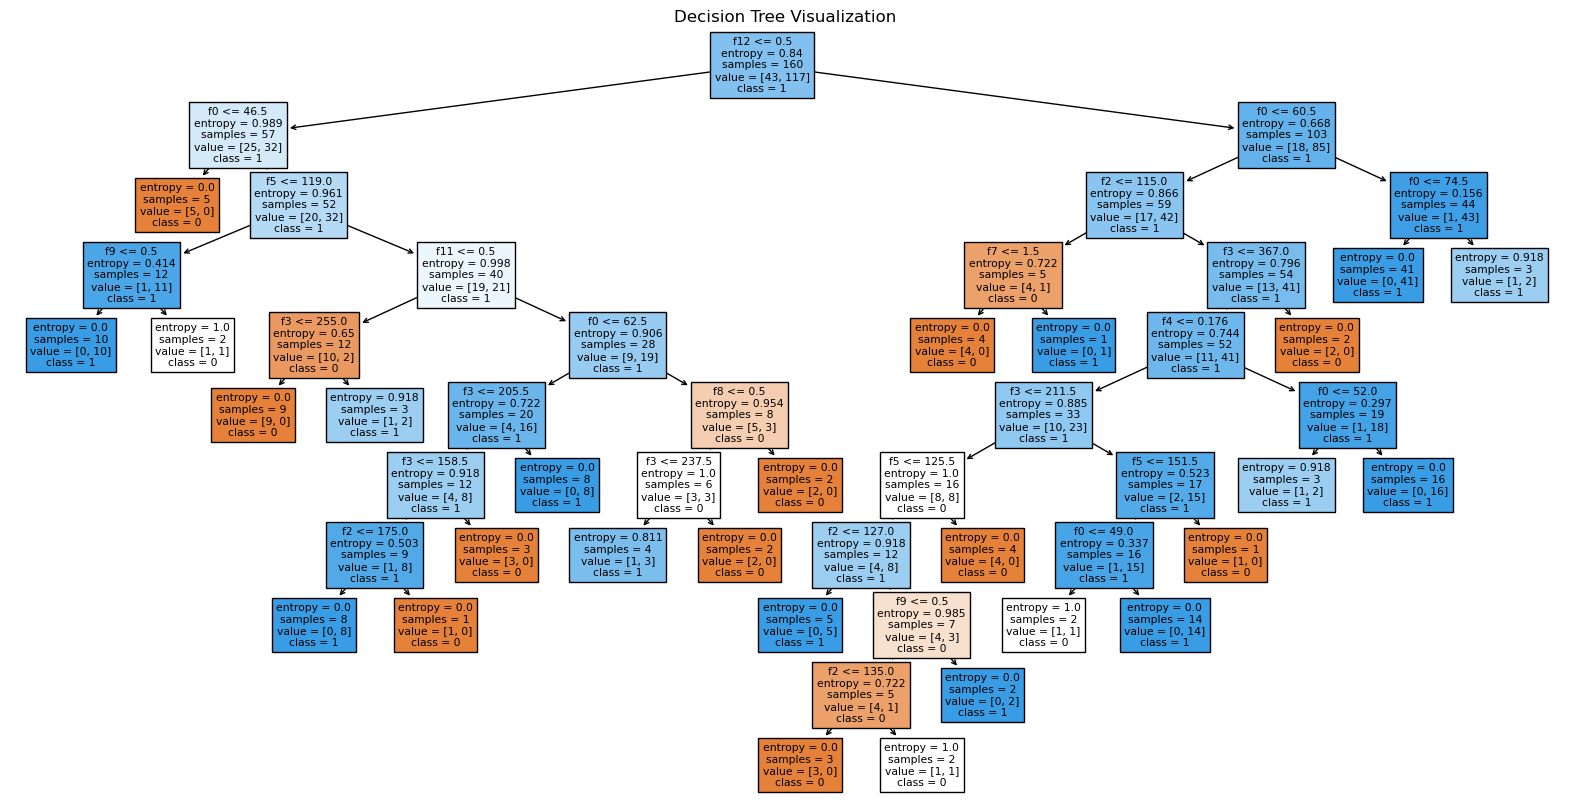

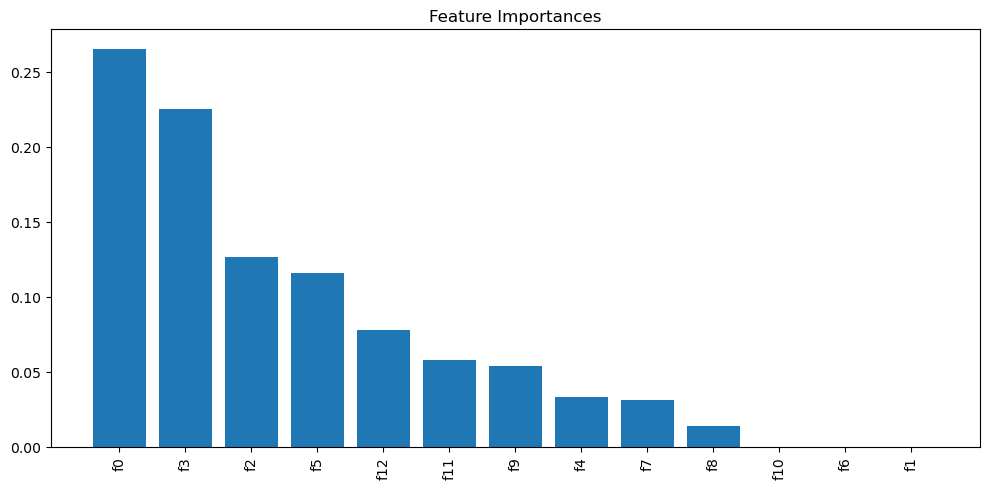

In [1398]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dt_model=DecisionTreeClassifier(random_state=42,criterion= 'entropy', max_depth= None, min_samples_split= 5)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

print(f"Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_dt):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_dt)}")

plt.figure(figsize=(20,10))
plot_tree(dt_model,filled=True,feature_names=[f'f{i}' for i in range(len(x.columns))],class_names=['0','1'])
plt.title('Decision Tree Visualization')
plt.show()

importances=dt_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.tight_layout()
plt.show()

Gradient Boosting Results:
Accuracy: 0.775
Recall: 0.9688
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.97      0.87        32

    accuracy                           0.78        40
   macro avg       0.40      0.48      0.44        40
weighted avg       0.64      0.78      0.70        40



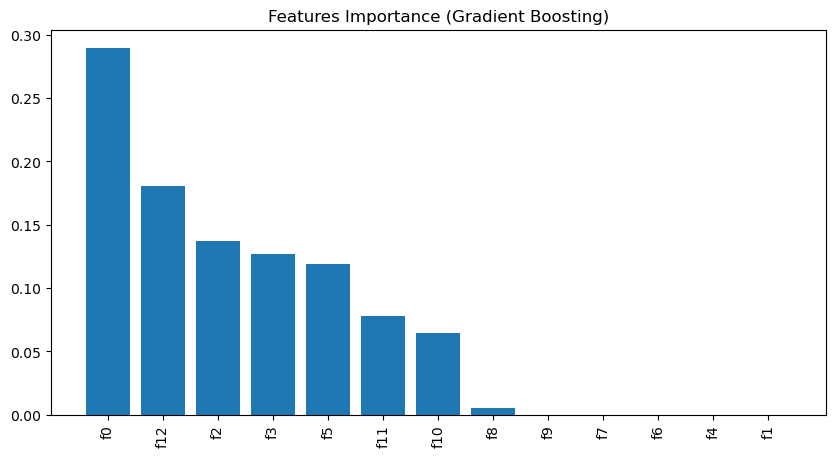

In [1399]:
gb_model=GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 50)
gb_model.fit(x_train,y_train)

y_pred_gb=gb_model.predict(x_test)

print(f"Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_gb)}")
print(f"Recall: {recall_score(y_test,y_pred_gb):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_gb)}")

importances=gb_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)),importances[indices])
plt.title('Features Importance (Gradient Boosting)')
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.show()

Random Forest Results
Accuracy: 0.8000
Recall: 0.9688
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.82      0.97      0.89        32

    accuracy                           0.80        40
   macro avg       0.66      0.55      0.54        40
weighted avg       0.75      0.80      0.75        40



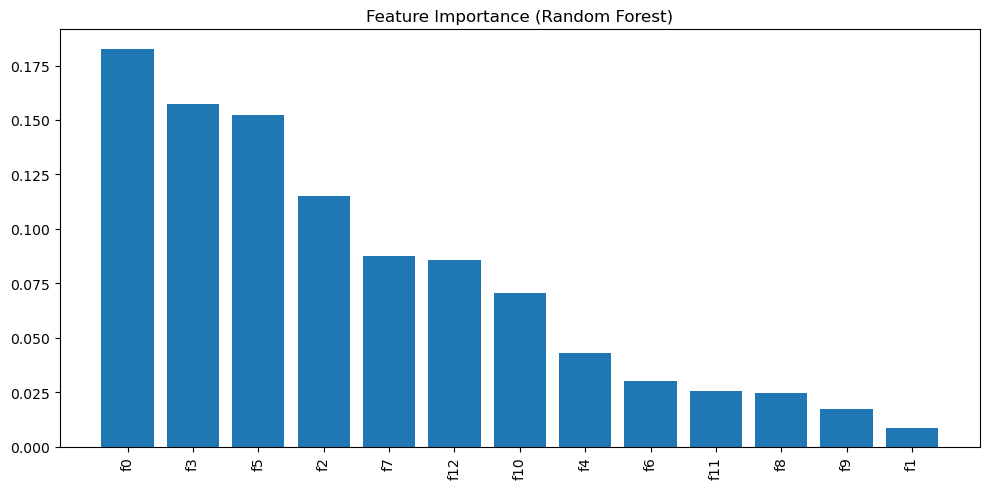

In [1400]:
rf_model=RandomForestClassifier(max_depth= 5, max_features= 'sqrt', min_samples_split= 2, n_estimators= 200)
rf_model.fit(x_train,y_train)

y_pred_rf=rf_model.predict(x_test)

print(f"Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test,y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test,y_pred_rf):.4f}")
print(f"Classification Report: {classification_report(y_test,y_pred_rf)}")

importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title('Feature Importance (Random Forest)')
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)),[f'f{i}' for i in indices],rotation=90)
plt.tight_layout()
plt.show()

In [1431]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x,y,test_size=0.2,random_state=42)

x_train_scaled_svm=scaler.transform(x_train_svm)
x_test_scaled_svm=scaler.transform(x_test_svm)

print(f"Dataset Shape: {x.shape}")
print(f"Number Of Classes: {len(np.unique(y))}")

svm_model=SVC(C= 0.1, gamma= 'scale', kernel= 'linear',random_state=42,probability=True)
svm_model.fit(x_train_scaled_svm,y_train_svm)

y_pred_svm=svm_model.predict(x_test_scaled_svm)

print(f"SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_svm,y_pred_svm)}")
print(f"Recall: {recall_score(y_test,y_pred_svm):.4f}")
print(f"Classification Report: {classification_report(y_test_svm,y_pred_svm)}")

Dataset Shape: (200, 13)
Number Of Classes: 2
SVM Results:
Accuracy: 0.8
Recall: 0.9375
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.83      0.94      0.88        32

    accuracy                           0.80        40
   macro avg       0.67      0.59      0.61        40
weighted avg       0.77      0.80      0.77        40



In [1402]:
y_proba = gb_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.5195


C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


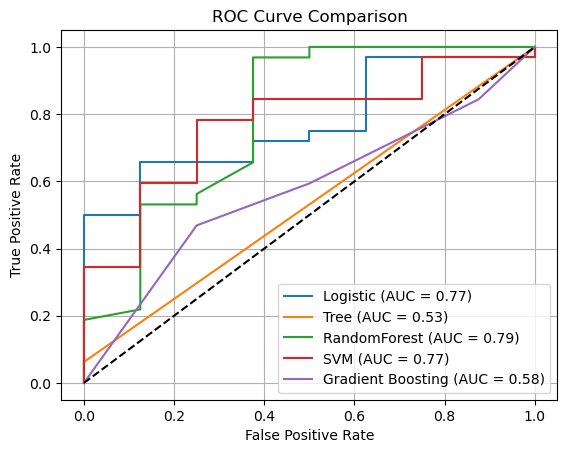

In [1403]:
models = {'Logistic': lr_model, 'Tree': dt_model, 'RandomForest': rf_model,'SVM':svm_model,'Gradient Boosting':gb_model}
for name, m in models.items():
    y_probs = m.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


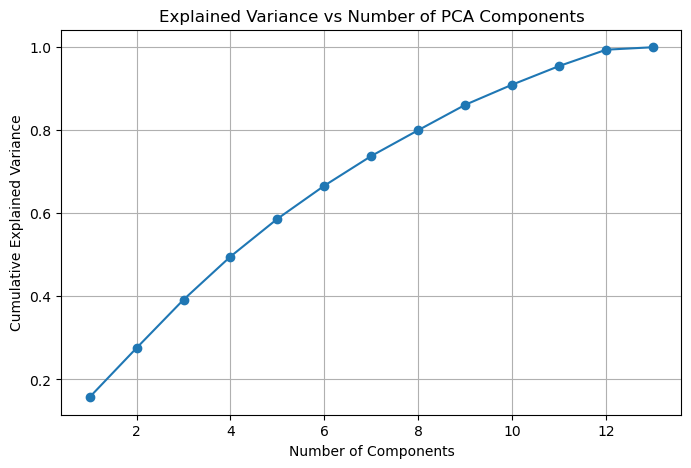

In [1405]:
# Assume X_scaled is your scaled feature matrix
pca = PCA().fit(x_scaled)

# Get cumulative explained variance
cum_var = pca.explained_variance_ratio_.cumsum()

# Plot it
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.show()

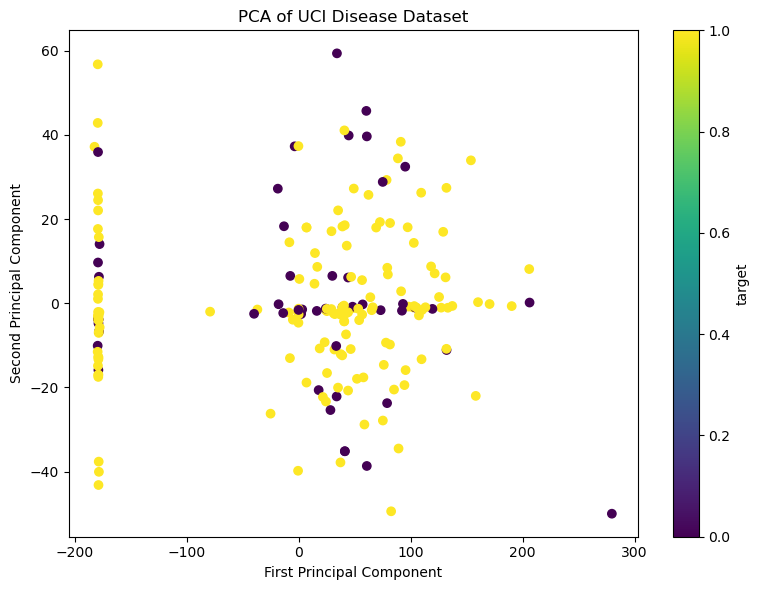

In [1407]:
pca=PCA(n_components=12)
x_pca=pca.fit_transform(x)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of UCI Disease Dataset')
plt.colorbar(label='target')
plt.tight_layout()
plt.show()

C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


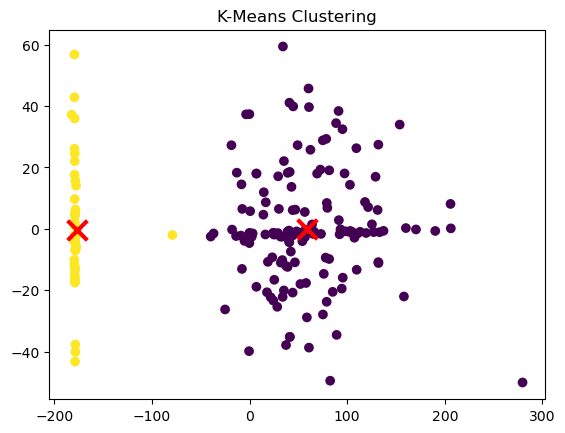

In [1409]:
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(x_pca)
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=200,linewidths=3,color='r')
plt.title('K-Means Clustering')
plt.show()

In [1410]:
y_true = y.values

y_clusters = kmeans.labels_

# Map clusters to true labels
labels = np.zeros_like(y_clusters)
for i in range(2):  # since you have 2 clusters
    mask = (y_clusters == i)
    labels[mask] = mode(y_true[mask])[0]

print("Accuracy:", accuracy_score(y_true, labels))
print("Recall:",recall_score(y_true,labels))
print("Confusion Matrix:\n", confusion_matrix(y_true, labels))
print("Classification Report:\n", classification_report(y_true, labels))

Accuracy: 0.745
Recall: 1.0
Confusion Matrix:
 [[  0  51]
 [  0 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.74      1.00      0.85       149

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200



C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


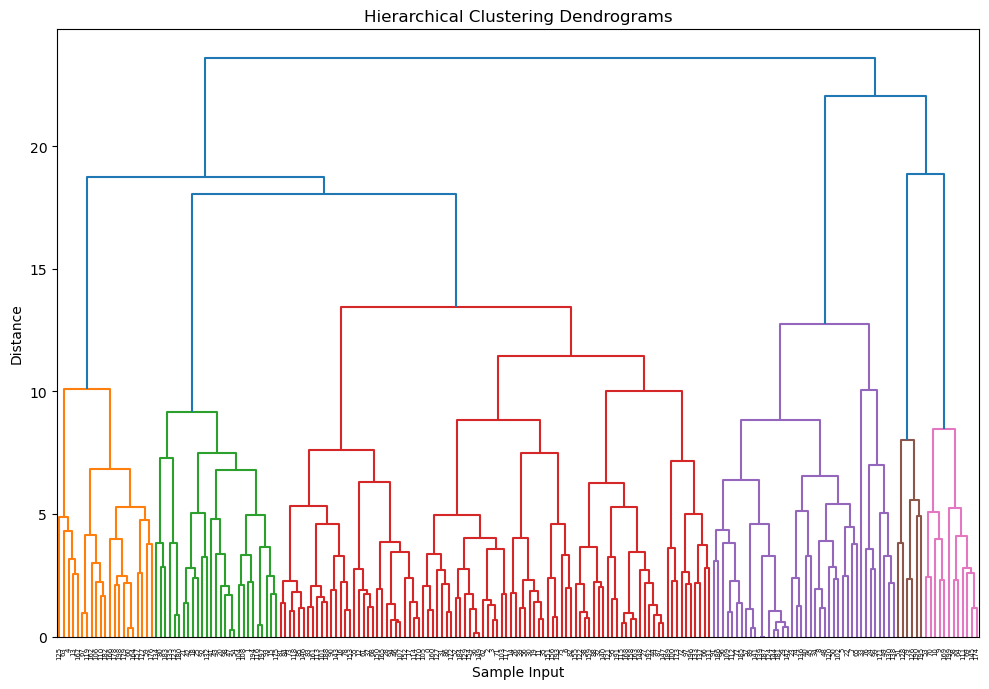

In [1411]:
linked=linkage(x_scaled,'ward')

plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrograms')
plt.xlabel('Sample Input')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [1412]:
silhouette_avg=silhouette_score(x_pca,kmeans.labels_)
print(f"The Average Silhouette Score is {silhouette_avg}")

if silhouette_avg>0.5:
    print(f"The Clustering Shows a Strong Structure")
elif silhouette_avg >0.25:
    print(f"The Clustering Shows a Reasonable Structure")
else:
    print(f"The Clustering structure is weak and could be artificial")

The Average Silhouette Score is 0.7314821284494621
The Clustering Shows a Strong Structure


In [1445]:
st.title("🔬 ML Results Viewer")
st.write("This app shows metrics for your trained model.")

# Confusion Matrix
st.subheader("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_dt)
st.write(cm)

# Classification Report
st.subheader("Classification Report")
report = classification_report(y_test, y_pred_dt, output_dict=True)
st.dataframe(pd.DataFrame(report).transpose())

# ROC Curve
st.subheader("ROC Curve & AUC Score")
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
st.pyplot(fig)

# Optional: Upload your own dataset
st.sidebar.header("Upload Your Data")
uploaded_file = st.sidebar.file_uploader("Upload CSV", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("Preview of uploaded data:")
    st.write(df.head())

In [1485]:
encoder=OneHotEncoder()

In [1493]:
x_encoded=pd.get_dummies(x)
saved_columns=x_encoded.columns

In [1495]:
joblib.dump(lr_model,'lr_model.pkl')
joblib.dump(dt_model,'dt_model.pkl')
joblib.dump(gb_model,'gb_model.pkl')
joblib.dump(rf_model,'rf_model.pkl')
joblib.dump(svm_model,'svm_model.pkl')
joblib.dump(saved_columns,'model_columns.pkl')
pd.DataFrame(x_scaled).to_csv('x_scaled.csv', index=False)
pd.DataFrame(x).to_csv('x.csv', index=False)
pd.DataFrame(y).to_csv('y.csv', index=False)
pd.DataFrame(input_df).to_csv('input_df.csv',index=False)